## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns                  
import matplotlib.pyplot as plt         
%matplotlib inline 

import warnings   
warnings.filterwarnings("ignore")
from collections import Counter

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, cross_val_score, GridSearchCV,RandomizedSearchCV, learning_curve, validation_curve)

# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Dataset

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
glass.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

### Columns
Attribute Information:

* Id number: 1 to 214
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)
  1- building_windows_float_processed
  2- building_windows_non_float_processed
  3- vehicle_windows_float_processed
  4- vehicle_windows_non_float_processed (none in this database)
  5- containers
  6- tableware
  7- headlamps

In [4]:
glass = glass.rename({"1":"Id number","1.52101":"RI","13.64":"Na","4.49":"Mg","1.10":"Al","71.78":"Si","0.06":"K","8.75":"Ca","0.00":"Ba","0.00.1":"Fe","1.1":"Type"}, axis='columns')
  
glass


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [5]:
glass.drop('Id number', axis=1, inplace=True)

In [6]:
glass.shape

(213, 10)

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are no null values in the dataset, We have a clean dataset.

## Target Column

In [8]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [9]:
glass['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

'Type' column is our label or Target column.

<AxesSubplot:title={'center':'Types of glasses'}>

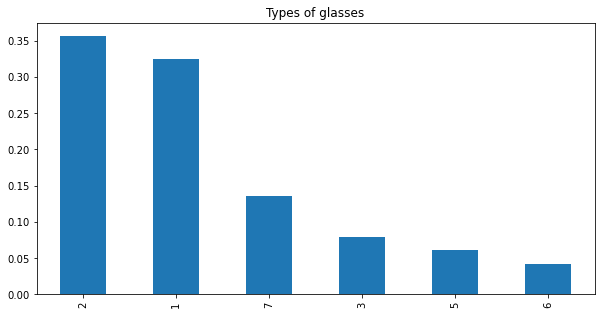

In [10]:
plt.figure(1)
glass['Type'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Types of glasses')

In [11]:
features = glass.columns[:-1].tolist()
print(glass.shape)

(213, 10)


### Univariate Plots

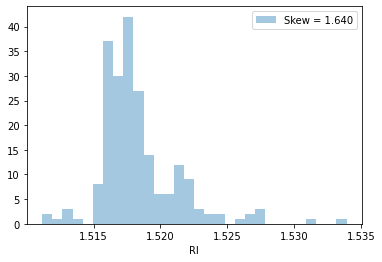

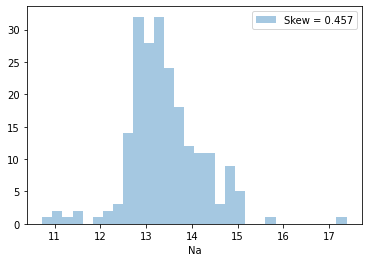

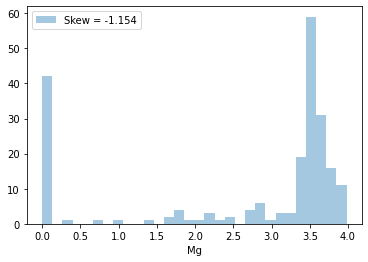

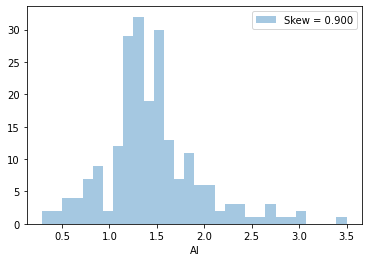

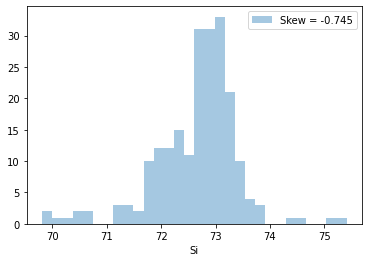

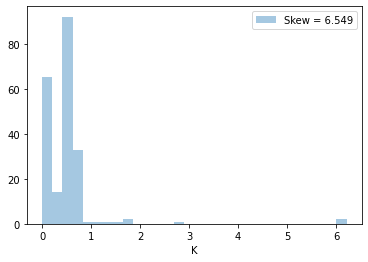

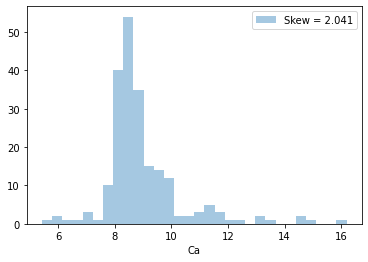

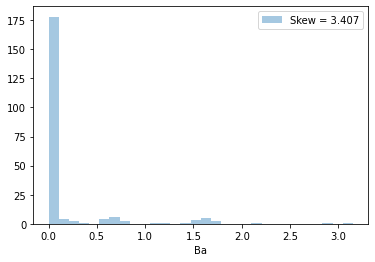

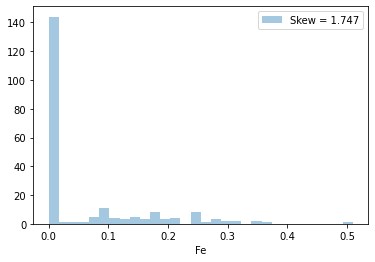

In [12]:
for i in features:
    skew = glass[i].skew()
    sns.distplot(glass[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Multivariate Plots

<Figure size 576x576 with 0 Axes>

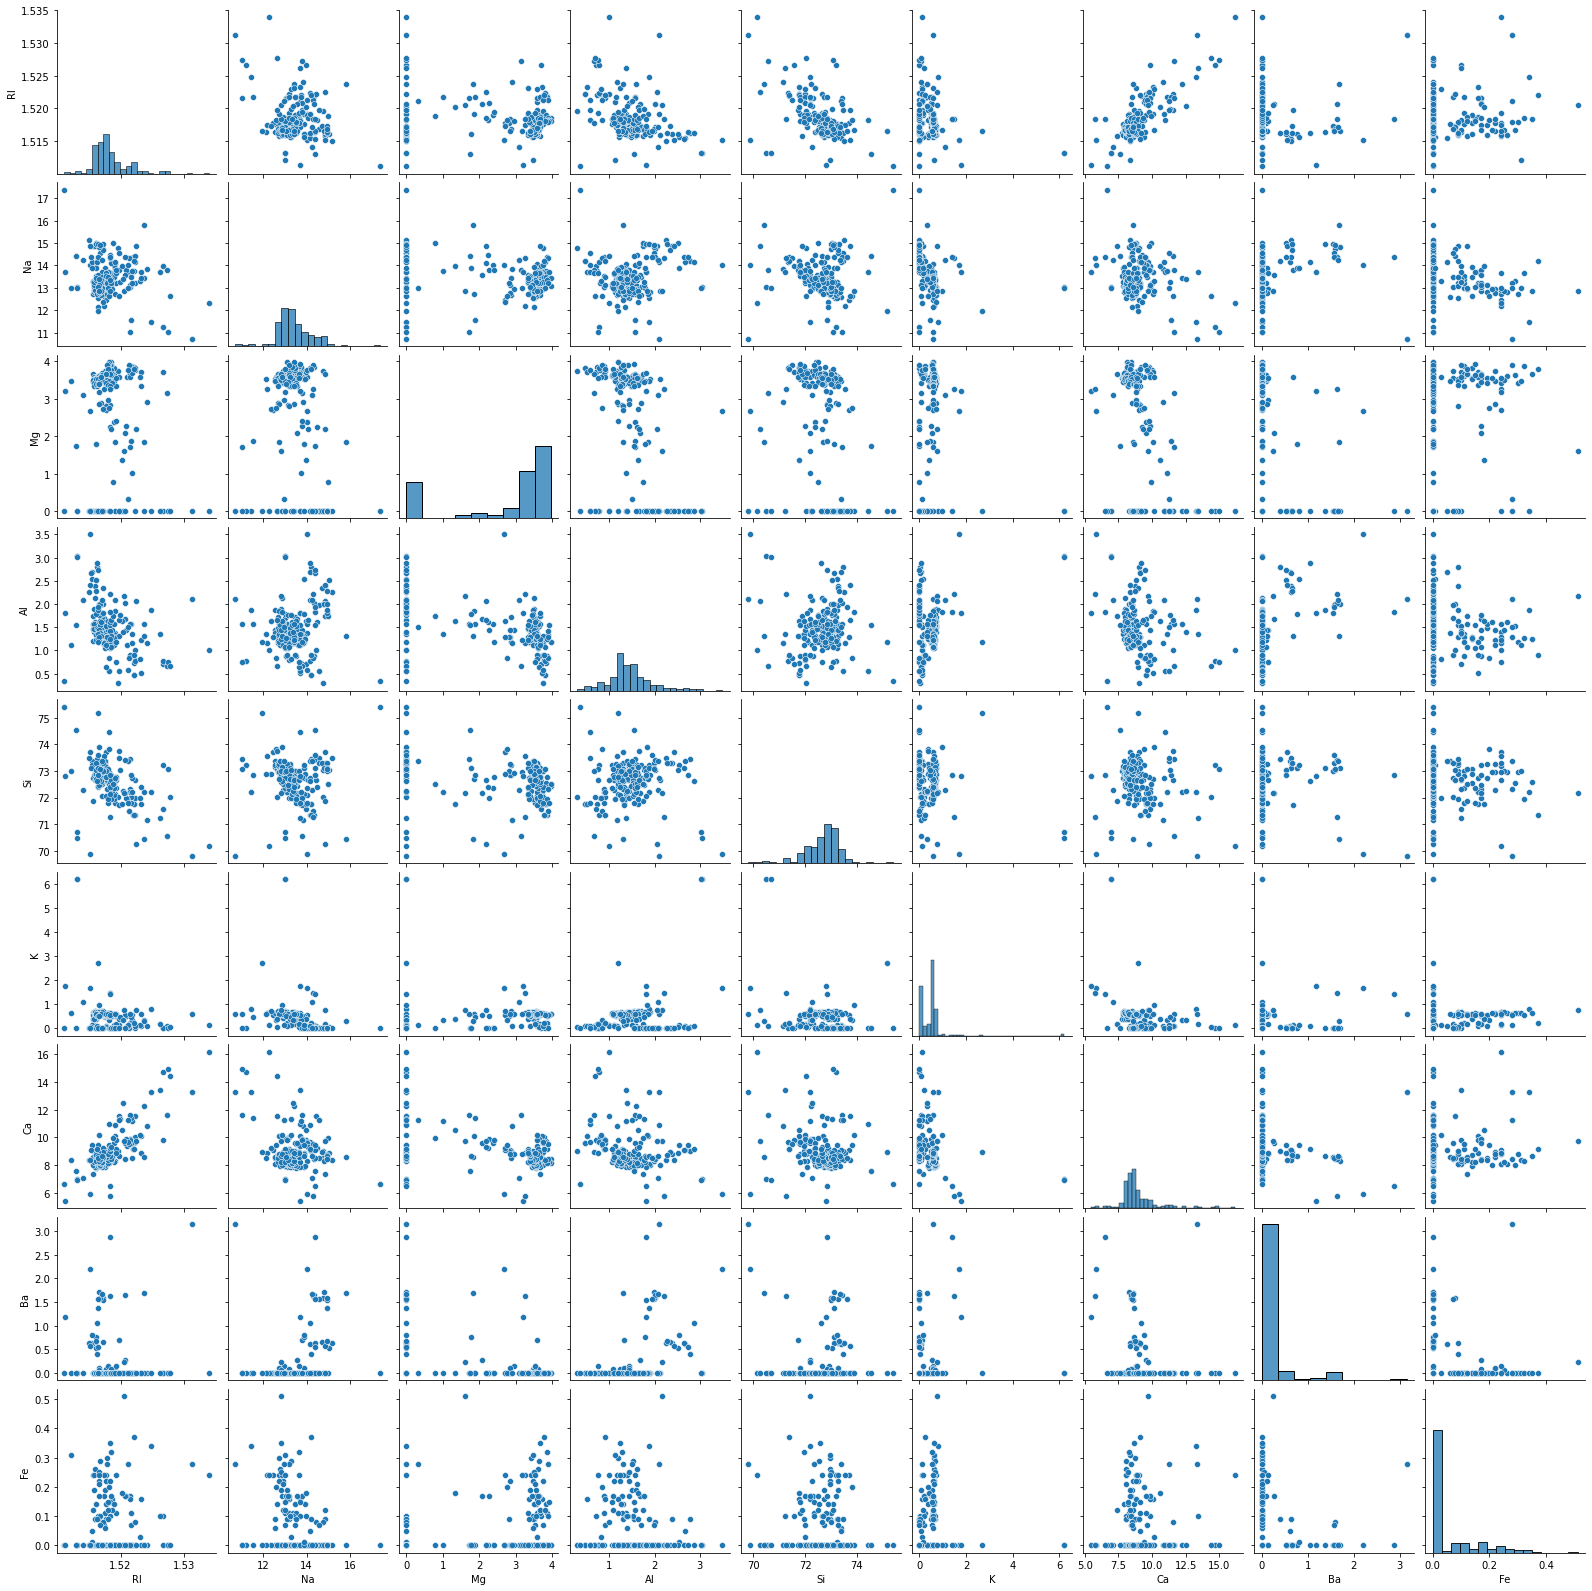

In [14]:
plt.figure(figsize=(8,8))
sns.pairplot(glass[features],palette='coolwarm')
plt.show()

<AxesSubplot:>

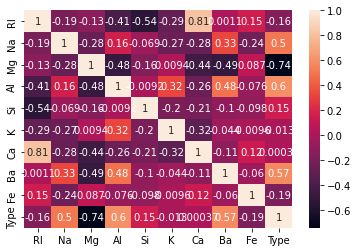

In [15]:
sns.heatmap(glass.corr(),annot=True)

### Target Column vs Refractive Index 'RI' Column

<AxesSubplot:xlabel='Type', ylabel='RI'>

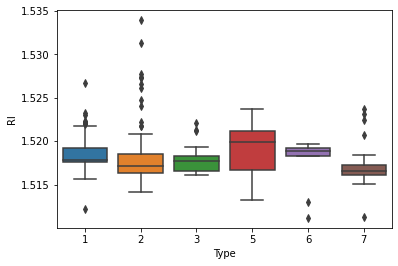

In [16]:
sns.boxplot(x='Type', y='RI', data=glass)

### Traget Column vs Other Columns

<Figure size 432x288 with 0 Axes>

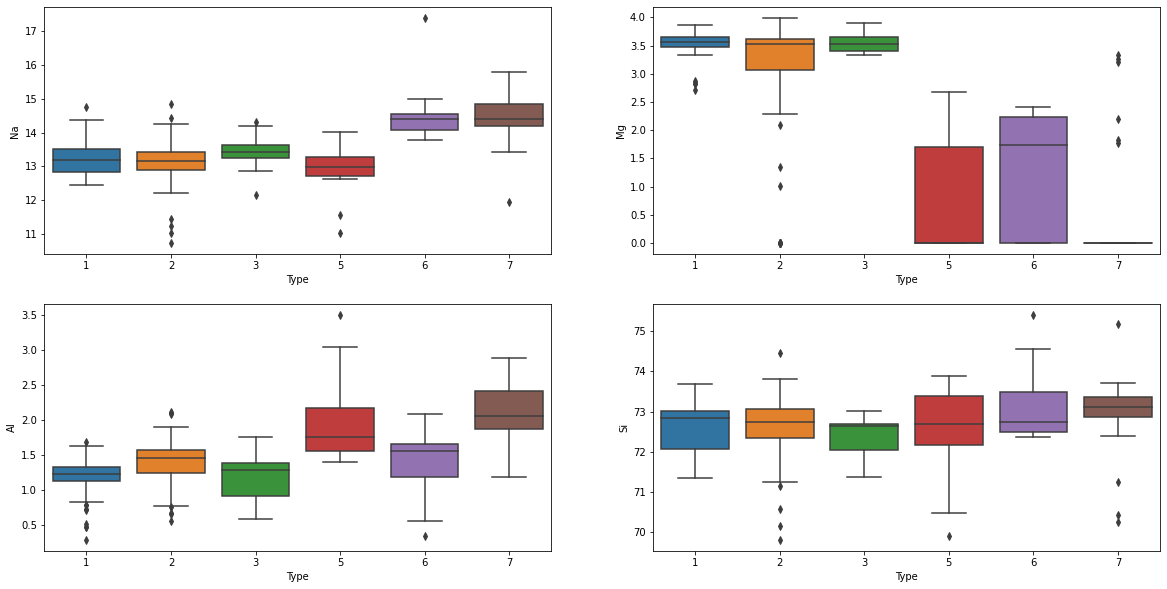

In [17]:
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=glass['Type'],y=glass['Na'])
plt.title= 'Sodium Content'
plt.subplot(2,2,2) 
sns.boxplot(x=glass['Type'],y=glass['Mg'])
plt.title= 'Magnesium Content' 
plt.subplot(2,2,3) 
sns.boxplot(x=glass['Type'],y=glass['Al'])
plt.title= 'Aluminum Content'
plt.subplot(2,2,4) 
sns.boxplot(x=glass['Type'],y=glass['Si'])
plt.title= 'Silicon Content'
plt.show()

<Figure size 432x288 with 0 Axes>

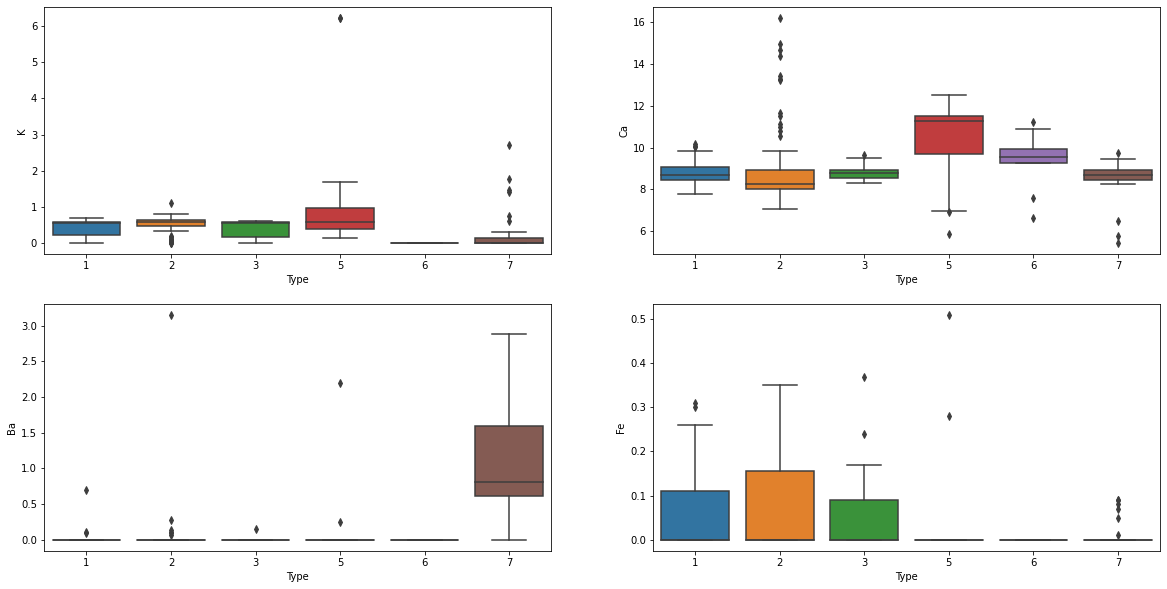

In [18]:
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=glass['Type'],y=glass['K'])
plt.title= 'Potassium Content'
plt.subplot(2,2,2) 
sns.boxplot(x=glass['Type'],y=glass['Ca'])
plt.title= 'Calcium Content' 
plt.subplot(2,2,3) 
sns.boxplot(x=glass['Type'],y=glass['Ba'])
plt.title= 'Barium Content'
plt.subplot(2,2,4) 
sns.boxplot(x=glass['Type'],y=glass['Fe'])
plt.title= 'Iron Content'
plt.show()

**It seems like there two many outliers in the dataset, so we are going to remove them.**

### Removing Outliers

In [19]:
# Checking rows with more than one outlier
def outlier_hunt(glass):
    outlier_indices = []
    
    for col in glass.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(glass[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(glass[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers

In [20]:
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features]))))

The dataset contains 14 observations with more than 2 outliers


In [21]:
outlier_indices = outlier_hunt(glass[features])
glass = glass.drop(outlier_indices).reset_index(drop=True)
print(glass.shape)

(199, 10)


## **ML Models**

### Validation Process

In [22]:
X = glass[features]
y = glass['Type']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### **KNN**

In [24]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [25]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8120805369127517, 0.72)

### **SVM**

In [26]:
svm = SVC(kernel='linear',C = 500)
svm.fit(X_train, y_train)

SVC(C=500, kernel='linear')

In [27]:
svm.score(X_train, y_train), svm.score(X_test, y_test)

(0.7583892617449665, 0.6)

### **Decision Tree**

In [28]:
test_dt = DecisionTreeClassifier()
test_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
test_dt.score(X_train, y_train), test_dt.score(X_test, y_test)

(1.0, 0.72)

#### Grid Search CV

In [30]:
param_grid = {"max_depth": [7, 9, None],
              "max_features": [5, 7, 9],
              "min_samples_split": [4, 7, 9],
              "criterion": ["gini", "entropy"]}

In [31]:
gs = GridSearchCV(test_dt, param_grid=param_grid, cv=10)
gs.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, None], 'max_features': [5, 7, 9],
                         'min_samples_split': [4, 7, 9]})

In [32]:
gs.best_score_

0.6934210526315789

In [33]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_samples_split=7)

In [34]:
dt = DecisionTreeClassifier(max_features=5,min_samples_split=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=5, min_samples_split=7)

In [35]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8859060402684564, 0.66)

### **Random Forest**

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rfc.score(X_train, y_train),rfc.score(X_test, y_test)

(1.0, 0.86)

### **AdaBoost** 

In [38]:
ada = AdaBoostClassifier()
ada.fit(X, y)

AdaBoostClassifier()

In [39]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.4161073825503356, 0.38)

### **Gradient Boost**

In [40]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [41]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.959731543624161, 0.76)

### **Naive Bayes**

In [42]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [43]:
nb.score(X_train, y_train), nb.score(X_test, y_test)

(0.5838926174496645, 0.62)

## **Conclusion**

In [44]:
models = ['KNN','SVM','Decision Tree','Random Forest','AdaBoost','Gradient Boost','Naive Bayes']
conclusion = pd.DataFrame(models,columns=['Models'])

In [45]:
m = [knn, svm, dt, rfc, ada, gbc, nb]
train = []
test = []
for i in m:
    train.append(i.score(X_train,y_train))
    test.append(i.score(X_test,y_test))

In [46]:
conclusion['Train_score']=train
conclusion['Test_score']=test

In [47]:
conclusion

,Models,Train_score,Test_score
0,KNN,0.812081,0.72
1,SVM,0.758389,0.60
2,Decision Tree,0.885906,0.66
3,Random Forest,1.000000,0.86
4,AdaBoost,0.416107,0.38
5,Gradient Boost,0.959732,0.76
6,Naive Bayes,0.583893,0.62


#### **KNN model seems to work best on this dataset.**